# /5评估数据/ Assessing
Use the space below to explore `all_alpha_08.csv` and `all_alpha_18.csv` to answer the quiz questions below.

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
# pprint的使用和print类似，所以采用了 from import 的引入方式，方便调用

%matplotlib inline

# 载入原始数据
df08 = pd.read_csv('all_alpha_08.txt', sep = '\t')
df18 = pd.read_csv('all_alpha_18.txt', sep = '\t')
# 注意原文件链接为xlsx、zip和txt（不是csv，csv课程中没给出链接）
# 使用read_csv读入，发现没有分列，看样子是tab分割
# 加个 sep = '\t'指定使用tab分割解决
# （mac 遇到奇怪问题下载的文件都很奇怪，可能和单位网有关）

In [516]:
df08.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no


In [517]:
df18.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330


1.每个数据集中的样本数

2.每个数据集中的列数

In [518]:
print(df08.shape)
print(df18.shape)

(2404, 18)
(2648, 18)


3.每个数据集中重复的行数

In [519]:
# 检查重复行数
sum_dup_08 = sum(df08.duplicated())
sum_dup_18 = sum(df18.duplicated())
print(sum_dup_08,sum_dup_18)

25 0


In [520]:
# 检查列名
df08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [521]:
df18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

In [522]:
# plus check unique at fuel
df08['Fuel'].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

4.列的数据类型

In [523]:
print(df08.dtypes)
# 也可以使用info，会多一些信息
print('------------')
df08.info()

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area         

5.具有缺失值的特征

In [524]:
null_list = []
for i in df08.columns:
    if df08[i].isnull().any():
        null_list.append(i)
null_list
# 使用判断把空置输出为一列

['Cyl',
 'Trans',
 'Drive',
 'FE Calc Appr',
 'City MPG',
 'Hwy MPG',
 'Cmb MPG',
 'Unadj Cmb MPG',
 'Greenhouse Gas Score']

In [525]:
# 使用isnull.sum检查空数据数量
nucheck = df08.isnull().sum()
nucheck

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [526]:
# 看下占的百分比
round(nucheck/df08.shape[0],3)
# round(float,n) 的作用是把float小数，保留到小数点后n位
# 当然了 nucheck是求出的丢失值的数量，df08.shape[0]是数据的行数

Model                   0.000
Displ                   0.000
Cyl                     0.083
Trans                   0.083
Drive                   0.039
Fuel                    0.000
Sales Area              0.000
Stnd                    0.000
Underhood ID            0.000
Veh Class               0.000
Air Pollution Score     0.000
FE Calc Appr            0.083
City MPG                0.083
Hwy MPG                 0.083
Cmb MPG                 0.083
Unadj Cmb MPG           0.083
Greenhouse Gas Score    0.083
SmartWay                0.000
dtype: float64

6.每个数据集中特征的非空唯一值的数量

In [527]:
for i in df08.columns:
    print(i, end = ' : ')
    print(df08[i].nunique())
# 可以使用格式化字符串来更好的显示，请自行实验
# 这些唯一值都是什么，以及每个的计数

Model : 436
Displ : 47
Cyl : 8
Trans : 14
Drive : 2
Fuel : 5
Sales Area : 3
Stnd : 12
Underhood ID : 343
Veh Class : 9
Air Pollution Score : 13
FE Calc Appr : 2
City MPG : 39
Hwy MPG : 43
Cmb MPG : 38
Unadj Cmb MPG : 721
Greenhouse Gas Score : 20
SmartWay : 2


In [528]:
# 加上value_counts 看下
# 使用[1:]将车型过滤掉
for i in df08.columns[1:]:
    print('\n', i, ':')
    print(df08[i].value_counts())


 Displ :
3.5    194
2.4    184
2.5    171
3.0    158
2.0    132
3.6    110
5.3    108
6.0    103
3.7     86
5.4     81
4.0     80
4.6     80
4.8     74
2.3     71
2.7     68
3.8     62
5.7     59
4.2     57
4.7     45
6.2     41
1.8     36
3.2     34
2.2     30
5.5     30
5.0     29
3.3     24
1.6     24
2.9     24
4.3     22
5.6     20
3.1     18
4.4     16
3.4     16
6.7     14
6.8     13
1.5     12
6.1     12
5.9     12
2.8     12
6.5     10
3.9      8
4.5      6
1.3      6
8.4      4
5.2      4
7.0      2
8.0      2
Name: Displ, dtype: int64

 Cyl :
(6 cyl)     864
(4 cyl)     600
(8 cyl)     533
(5 cyl)     113
(12 cyl)     60
(10 cyl)     29
(2 cyl)       4
(16 cyl)      2
Name: Cyl, dtype: int64

 Trans :
Auto-L4    502
Auto-L5    329
Auto-S6    327
Man-6      295
Man-5      269
Auto-S5    147
Auto-L6    118
Auto-AV     86
Auto-L7     42
Auto-S4     42
Auto-S7     22
Auto-4      10
Auto-6       8
S8           8
Name: Trans, dtype: int64

 Drive :
2WD    1525
4WD     786
Name: D

# /6清理列标签/ 清除列标签
使用 all_alpha_08.csv 和 all_alpha_18.csv

In [529]:
#先检查下原有数据
print(df08.shape)
df08.columns

(2404, 18)


Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [530]:
# 丢弃多余列08
drop_list = ['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG']
# df08.drop(drop_list, axis=1, inplace=True)
df08new = df08.drop(drop_list, axis=1)
# 在大文档时候建议用新的变量，而不是True，否则前后会混
# （工程时除外，因为能节省内存）
print(df08new.shape)
df08new.columns

(2404, 14)


Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [531]:
# 丢弃多余列18
drop_list = ['Stnd','Stnd Description','Underhood ID','Comb CO2']
#df18.drop(drop_list, axis=1, inplace=True)
df18new = df18.drop(drop_list, axis=1)
print(df18new.shape)
df18new.columns

(2648, 14)


Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [532]:
# 先检查一下有没有列不同的
print(df08new.columns == df18new.columns)
# 输出是个boolean的列表，比较直观

[ True  True  True  True  True  True False  True  True  True  True  True
  True  True]


In [533]:
# 先转换列标题（万恶的空格）

# 注意：先转换格式再替换
# 可以消除代码执行顺序可能带来的坑
# 因为先辨准化了，所以就不用考虑替换的是之前的列名还是转换之后的列名了

# 还有就是把列中的空格替换成下滑线
# 因为很多处理要对空格判断，不要有比较好
# 全部变为小写是习惯，了解一下吧
df08new.rename(columns=lambda x:
             x.strip().lower().replace(" ", "_"),
             inplace=True)
# .strip是去除单词首尾的空格
# .lower是变为小写
# .replace是把小括弧里的做替换
df08new.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'sales_area',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [534]:
# df18 也做一遍，再检查列是否一致
df18new.rename(columns=lambda x:
             x.strip().lower().replace(" ", "_"),
             inplace=True)
df18new.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [535]:
# 检查列是否一致
df08new.columns == df18new.columns

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [536]:
# 把08列的独特名字得出来
for i in df08new.columns:
    if i not in df18new.columns:
        print(i)

# 把18列的独特名字得出来
for i in df18new.columns:
    if i not in df08new.columns:
        print(i)
        
# 如果是第二次执行，因为已经替换了，所以不会有输出

sales_area
cert_region


In [537]:
# 根据上面输出进行替换

# 将08的替换为18的
df08new.rename(columns = 
            lambda x: x.replace('sales_area', 'cert_region'), 
            inplace = True)
# 这里使用的是lambda x:
# 就是对columns执行后面的操作 x.replace
# 而x.replace的操作是把后面小括弧中的前面替换成后面


In [538]:
# 检查下，已经修改过来了
df08new.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [539]:
# 也可以用这个，比较安静的，因为加了.all()所以只会出一个True或者False
# 前面的小括弧是.all的输入
(df08new.columns == df18new.columns).all()

True

In [540]:
# 保存数据
df08new.to_csv('data_08a.csv', index=False)
df18new.to_csv('data_18a.csv', index=False)
# 保存第一版csv数据（按照a,b,c命名）

# /7过滤、丢空、去重/ 过滤、丢弃空值、重复数据删除
使用 data_08.csv 和 data_18.csv

In [541]:
# 接上节，读入两个数据
df08a = pd.read_csv('data_08a.csv')
df18a = pd.read_csv('data_18a.csv')

In [542]:
# 按认证区域过滤09
def cleancol(df, region):
    print('start filtering on {}'.format(region).center(40,'-'))
    # 使用center优化显示
    
    print('before cleanning:', df.shape)
    df = df.query('cert_region == @region')
    # 注意这里因为比较的是变量，所以前面要加@
    
    df.drop(['cert_region'],axis=1,inplace=True)
    # 清理完成后 cert_region 这列就没用了，清理掉
    print('after cleaning: {} \n'.format(df.shape))
    pprint(df.info)
    return df


df18a = cleancol(df18a, 'CA')
df08a = cleancol(df08a, 'CA')
# 此cell如果执行多遍会有问题因为已经drop了cert_region
# 少年，要不要使用try/except优化试试看？

---------start filtering on CA----------
before cleanning: (2648, 14)
after cleaning: (1307, 13) 

<bound method DataFrame.info of                                     model  displ   cyl        trans drive  \
0                               ACURA ILX    2.4   4.0        AMS-8   2WD   
2                               ACURA MDX    3.0   6.0        AMS-7   4WD   
4                               ACURA MDX    3.5   6.0   SemiAuto-9   2WD   
5                               ACURA MDX    3.5   6.0   SemiAuto-9   2WD   
8                               ACURA MDX    3.5   6.0   SemiAuto-9   4WD   
9                               ACURA MDX    3.5   6.0   SemiAuto-9   4WD   
12                              ACURA NSX    3.5   6.0        AMS-9   4WD   
15                              ACURA RDX    3.5   6.0   SemiAuto-6   2WD   
17                              ACURA RDX    3.5   6.0   SemiAuto-6   4WD   
18                              ACURA RLX    3.5   6.0        AMS-7   4WD   
20                    

In [543]:
df18a.shape

(1307, 13)

In [544]:
df08a.shape

(1084, 13)

In [545]:
# 丢弃含有缺失值的行
# 检查下缺失值
print(df08a.isnull().sum())
# 丢弃有缺失的
df08a.dropna(inplace = True)
df08a.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64


model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [546]:
print(df18a.isnull().sum())
df18a.dropna(inplace = True)
df18a.isnull().sum()

model                    0
displ                   15
cyl                     15
trans                    0
drive                    0
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                 0
hwy_mpg                  0
cmb_mpg                  0
greenhouse_gas_score     0
smartway                 0
dtype: int64


model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [547]:
# double check 一下
# 使用.all 或者 .any可以指定在all的情况下河any的情况下做汇总
# notnull any 就是说是不是任意一行都没有空值
df08a.notnull().sum().any()

True

In [548]:
# 和isnull any 的结果相反就对了
# 后者表示有任何的值是空的么？
df18a.notnull().sum().any()

True

In [549]:
# 重复数据删除
print(df08a.duplicated().sum())
df08a.drop_duplicates(inplace = True)
print(df08a.duplicated().sum())

23
0


In [550]:
print(df18a.duplicated().sum())
df18a.drop_duplicates(inplace = True)
print(df18a.duplicated().sum())

10
0


In [551]:
# 保存进度，以便下一段使用
df08a.to_csv('data_08b.csv', index=False)
df18a.to_csv('data_18b.csv', index=False)
# 建议使用不同的文件名，等都完成后再调优，避免覆盖文件带来的麻烦
# 08b 和 18b 的 b 是beta的意思，这里从原始数据得到了第一个csv文件

# /8检查数据类型/ Inspecting Data Types
Use the space below to explore data_08.csv and data_18.csv to answer the quiz questions below regarding datatypes.

In [602]:
datalist = ['data_08b.csv', 'data_18b.csv']

def datains(datalist):
# 写个函数依次读入数据
    for i in datalist:
        print('inspecting {}'.format(i).center(40,'-'))
        #print('start filtering on {}'.format(region).center(40,'-'))
        df = pd.read_csv(i)
        print(df.head(),'\n')
        print(df.info(),'\n')

# 检查数据
datains(datalist)
        
# 创建df
df08b = pd.read_csv('data_08b.csv')
print(df08b.shape)
df18b = pd.read_csv('data_18b.csv')
print(df18b.shape)

--------inspecting data_08b.csv---------
       model  displ      cyl    trans drive      fuel    veh_class  \
0  ACURA MDX    3.7  (6 cyl)  Auto-S5   4WD  Gasoline          SUV   
1  ACURA RDX    2.3  (4 cyl)  Auto-S5   4WD  Gasoline          SUV   
2   ACURA RL    3.5  (6 cyl)  Auto-S5   4WD  Gasoline  midsize car   
3   ACURA TL    3.2  (6 cyl)  Auto-S5   2WD  Gasoline  midsize car   
4   ACURA TL    3.5  (6 cyl)  Auto-S5   2WD  Gasoline  midsize car   

  air_pollution_score city_mpg hwy_mpg cmb_mpg greenhouse_gas_score smartway  
0                   7       15      20      17                    4       no  
1                   7       17      22      19                    5       no  
2                   7       16      24      19                    5       no  
3                   7       18      26      21                    6      yes  
4                   7       17      26      20                    6      yes   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries,

- cyl字符串要转换成数字
- air_polution转成浮点（object是字符串）
- city_mpg、hwy_mpg、cmb_mpg将字符串转换为浮点型
- greenhouse_gas_score从字符转为浮点

# /9修正数据类型第1部分/

In [603]:
# 使用str的extract检索里面的数字
print(df08b['cyl'].value_counts())

# 为了处理数据的时候重复运行不报错使用 try 来判断是否已经修改
# （因为已经处理过了再处理经常会报错）
try:
    df08b['cyl'] = df08b['cyl'].str.extract('(\d+)').astype(int)
# （\d+)是匹配任意数字的意思，有兴趣的可以回顾下格式化字符串的内容
except AttributeError:
    print('!!! cyl type has been changed already! pass!')
else:
    pass
finally:
    pass

print('-----------')
print(df08b['cyl'].value_counts())
# 最后可以看出来格式已经转换了
type(df08b['cyl'][0])

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64
-----------
6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64


numpy.int64

In [604]:
# cyl18
print(df18b['cyl'].value_counts())
df18b['cyl'] = df18b['cyl'].astype(int)
# astype没有inplace参数，所以要赋值

try:
    df18b['cyl'] = df18b['cyl'].str.extract('(\d+)').astype(int)
# （\d+)是匹配任意数字的意思，有兴趣的可以回顾下格式化字符串的内容
except AttributeError:
    print('!!! cyl type has been changed already! pass!')
else:
    pass
finally:
    pass

print('-----------')

print(df18b['cyl'].value_counts())

4.0     604
6.0     411
8.0     208
12.0     25
3.0      21
10.0      8
2.0       2
5.0       2
16.0      1
Name: cyl, dtype: int64
!!! cyl type has been changed already! pass!
-----------
4     604
6     411
8     208
12     25
3      21
10      8
5       2
2       2
16      1
Name: cyl, dtype: int64


# /10修正数据类型第2部分/

如果运行以下代码会报错：
type(df08['air_pollution_score'][0])
df08['air_pollution_score'].astype(float, inplace = True)
df08['air_pollution_score'].astype(int, inplace = True)

- 像‘5.0’这样的字符如果使用int转换会报错
- ValueError: invalid literal for int() with base 10:
- 但使用float转换不会报错，详见：https://stackoverflow.com/questions/1841565/valueerror-invalid-literal-for-int-with-base-10#
- 原因是因为有 x/y 这种，所以转换会报错
- 这部分就是处理这个问题的

In [605]:
# 找出含有 / 的部分
# 也可以使用query方式
hb_08 = df08b[df08b['fuel'].str.contains('/')]

# 拆分为两列，使用copy否则会修改原数据
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# 确定要拆分的列
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
    # lambda对每个带/的进行分割，分别赋值第1个和第2个拆分元素
print(df1.head(3))
# 看下是否成功

dfnewrows = df1.append(df2)
print(df1.shape)
print(dfnewrows.shape)
dfnewrows.head(3)
# 检查数量

                  model  displ  cyl    trans drive     fuel  veh_class  \
582  MERCEDES-BENZ C300    3.0    6  Auto-L7   2WD  ethanol  small car   

    air_pollution_score city_mpg hwy_mpg cmb_mpg greenhouse_gas_score smartway  
582                   6       13      19      15                    7       no  
(1, 13)
(2, 13)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [606]:
# 更新df08
print(df08b.shape)

# 检查下要删除的行
print(hb_08.index)

# 删掉带 / 的行，加入拆分好的行
df08b.drop(hb_08.index, inplace = True)
df08c = df08b.append(dfnewrows, ignore_index = True)

# append 没有inplace参数
df08c.shape

(986, 13)
Int64Index([582], dtype='int64')


(987, 13)

In [607]:
df18b.shape

(1282, 13)

In [608]:
# 2018的数据
# air 和 green已经是float格式不用拆分
# 找出含有 / 的部分
# 也可以使用query方式
hb_18 = df18b[df18b['fuel'].str.contains('/')]
print(hb_18.shape)

# 拆分为两列，使用copy否则会修改原数据
# create two copies of the 2008 hybrids dataframe
df1 = hb_18.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_18.copy()  # data on second fuel type of each hybrid vehicle

# 确定要拆分的列
# columns to split by "/"
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
    # lambda对每个带/的进行分割，分别赋值第1个和第2个拆分元素
print(df1.head(3))
# 看下是否成功

dfnewrows = df1.append(df2)
print(df1.shape)
print(dfnewrows.shape)
dfnewrows.head(3)
# 检查数量

(74, 13)
              model  displ  cyl       trans drive      fuel  veh_class  \
25   AUDI A3 e-tron    1.4    4       AMS-6   2WD  Gasoline  small car   
83         BMW 330e    2.0    4  SemiAuto-8   2WD  Gasoline  small car   
109        BMW 530e    2.0    4  SemiAuto-8   2WD  Gasoline  small car   

     air_pollution_score city_mpg hwy_mpg cmb_mpg  greenhouse_gas_score  \
25                     7       34      39      36                    10   
83                     3       28      34      30                    10   
109                    7       27      31      29                    10   

    smartway  
25     Elite  
83       Yes  
109    Elite  
(74, 13)
(148, 13)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
25,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline,small car,7,34,39,36,10,Elite
83,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
109,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite


In [609]:
# plus 查看按照 veh_class的分类平均值
dfnewrows.groupby(['veh_class']).mean()

,displ,cyl,air_pollution_score,greenhouse_gas_score
veh_class,,,,
large car,3.490000,5.800000,3.400000,6.000000
midsize car,1.822222,3.888889,6.222222,9.888889
minivan,3.600000,6.000000,7.000000,10.000000
pickup,4.500000,7.047619,3.857143,3.238095
small SUV,2.171429,4.000000,5.000000,7.000000
small car,1.600000,3.636364,5.545455,9.545455
standard SUV,4.400000,7.000000,3.642857,4.357143
station wagon,1.600000,4.000000,7.000000,10.000000


In [612]:
# 检查下要删除的行
hb_18.index

Int64Index([  25,   83,  109,  110,  125,  167,  173,  174,  202,  258,  264,
             265,  266,  269,  294,  296,  298,  300,  309,  310,  311,  313,
             318,  329,  331,  408,  409,  410,  411,  412,  413,  414,  415,
             416,  417,  437,  479,  480,  481,  484,  499,  501,  505,  508,
             542,  573,  596,  670,  672,  695,  706,  720,  731,  918,  920,
             929,  934,  936,  938,  977,  997, 1100, 1117, 1123, 1124, 1125,
            1129, 1130, 1197, 1206, 1219, 1265, 1277, 1281],
           dtype='int64')

In [615]:
# 特别要注意代码执行顺序，这里最大删除的是1281行
## 如果开始的shape小于这个，否则会报错
# 使用 try / except 处理下

# 更新df18
print(df18b.shape)

try:
    df18b.drop(hb_18.index, inplace = True)
    df18c = df18b.append(dfnewrows, ignore_index = True)
except KeyError:
    print('data already cleaned!')
else:
    pass
finally:
    pass
    

#df18b.drop(hb_18.index, inplace = True)
#df18c = df18b.append(dfnewrows, ignore_index = True)
# append 没有inplace参数
df18c.shape

(1208, 13)
data already cleaned!


(1356, 13)

In [617]:
# 现在可以转换了 08 / 18
df08c.air_pollution_score = df08c.air_pollution_score.astype(float)
df18c.air_pollution_score = df18c.air_pollution_score.astype(float)

df08c.to_csv('data_08c.csv', index=False)
df18c.to_csv('data_18c.csv', index=False)

# /11 修正数据类型第3部分/ 修正 city_mpg、hwy_mpg、cmb_mpg 数据类型
2008 和 2018：将字符串转换成浮点

In [620]:
# 将 mpg 列转换成浮点
mpg_columns = ['city_mpg','hwy_mpg','cmb_mpg']
for c in mpg_columns:
    df18c[c] = df18c[c].astype(float)
    df08c[c] = df18c[c].astype(float)

In [621]:
# 将 greenhouse转成浮点
df18c['greenhouse_gas_score'] = df18c['greenhouse_gas_score'].astype(float)
df08c['greenhouse_gas_score'] = df08c['greenhouse_gas_score'].astype(float)

In [622]:
df08c.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score    float64
smartway                 object
dtype: object

In [623]:
df18c.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score    float64
smartway                 object
dtype: object

In [633]:
df08c.to_csv('clean_08.csv', index=False)
df18c.to_csv('clean_18.csv', index=False)
# 文件名是按照课程要求的格式

# /12 使用可视化探索数据/ Exploring with Visuals
Use clean_08.csv and clean_18.csv

In [660]:
# 读入数据
df08c = pd.read_csv('clean_08.csv')
df18c = pd.read_csv('clean_18.csv')

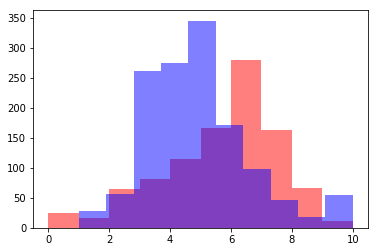

In [661]:
p08=plt.hist(df08c['greenhouse_gas_score'],color='r', alpha = 0.5)
p18=plt.hist(df18c['greenhouse_gas_score'],color='b', alpha = 0.5)
plt.show()
# 哇偶，可以看出18年的greenhouse_gas_score有所下降！
# 企鹅宝宝，，，有救了

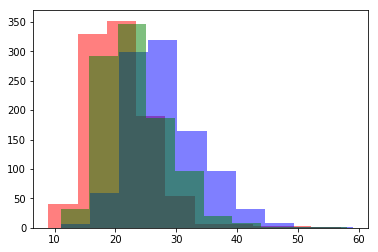

In [662]:
city=plt.hist(df08c['city_mpg'],color='r', alpha = 0.5)
hwy=plt.hist(df08c['hwy_mpg'],color='b', alpha = 0.5)
cmb = plt.hist(df08c['cmb_mpg'],color='g', alpha = 0.5)
plt.show()
# 从数据可以推断出city是在城市的速度（miles per hour）
# hwy是高速的，cmb是联合的

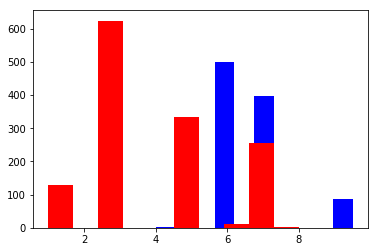

In [663]:
p08=plt.hist(df08c['air_pollution_score'],color='b')
p18=plt.hist(df18c['air_pollution_score'],color='r')

# 也是下降了，不好看
# 这里没有家alpha，没有透明度，一下就记住了对不对

# /13 结论和可视展示/ 得出结论
使用下列空间来处理数据集clean_08.csv 和clean_18.csv中的以下问题

## Q1: 与2008年相比，2018年是否有更多的车型（去重后）使用替代能源？比例增长了多少？

- 这部分feature pdf中没有特殊说明，bing出来：
- CNG 压缩天然气
- dissel 柴油
- Gasoline 汽油
- ethanol 乙醇
- gas 天然气

瞎想的（可以忽悠不懂的）
1. CNG是压缩天然气，另外一种是液化天然气LNG（C代表compressed，L代表liquid，LNG可以制造CNG，NG是不经压缩的gas）。后者更环保因为是液态，行驶也更远。但是前一种更加普遍（因为可以使用现在的汽油汽车改装，难道混合动力的都是这个货？）
1. 乙醇更环保,天燃气是混合物,里面可能包含一些S,N这些元素.当这些元素燃烧时会产生污染气体.乙醇燃烧的产物是二氧化碳和水.再者乙醇是可再生资源,所以目前有很多国家在汽油用填加乙醇,已减少汽油的使用量。
1. 在18年的数据中还有电力汽车（我的特斯拉啊，看着就帅！，，，，这模型还挺重的）马克思，，哦不马斯克的Solar City了解一下。
1. 综上所述，由于各年的value不同，我们就分为两个阵营进行比较（谁说要加权来的，你出来，我保证，，，不打死你，，，）Gasoline和diesel作为传统能源，其他都粗暴的归为清洁能源。

In [664]:
df08c.shape

(987, 13)

In [665]:
df08c.groupby(['fuel']).count()

,model,displ,cyl,trans,drive,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
fuel,,,,,,,,,,,,
CNG,1,1,1,1,1,1,1,1,1,1,1,1
Gasoline,984,984,984,984,984,984,984,984,984,984,984,984
ethanol,1,1,1,1,1,1,1,1,1,1,1,1
gas,1,1,1,1,1,1,1,1,1,1,1,1


In [666]:
df18c.groupby(['fuel']).count()

,model,displ,cyl,trans,drive,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
fuel,,,,,,,,,,,,
Diesel,31,31,31,31,31,31,31,31,31,31,31,31
Electricity,33,33,33,33,33,33,33,33,33,33,33,33
Ethanol,41,41,41,41,41,41,41,41,41,41,41,41
Gas,41,41,41,41,41,41,41,41,41,41,41,41
Gasoline,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210


In [667]:
# 方法1
cleanlist = ['cng', 'ethanol', 'gas', 'electricity']
# 先制定清洁能源的备选

def cleanratio(df):
    cnumber = 0
    fuel_list = list(set(df['fuel'].values))
    
    for i in fuel_list:
        if i.lower() in cleanlist:
        # 本例子中i不要变化，因为后面还要根据i来匹配
            cnumber = cnumber + df[df['fuel'] == i].shape[0]
    return round(cnumber / df.shape[0],4)
    # 使用round控制小数的精度：round（你要显示的数，你要显示的小数位数）
            
print(cleanratio(df08c))
print(cleanratio(df18c))
# 可见从6%增长到了9%

0.003
0.0848


In [724]:
# 方法2
# updated Kaido和Leo跑出来的简洁方法
cleanlist = ['cng', 'ethanol', 'gas', 'electricity']
# 先制定清洁能源的备选

def cleanratio2(df):
    # 此处首先将['fuel']中的值都转换为小写
    # 再通过isin进行过滤是否在cleanlist
    # 将过滤出来的做平均值（因为true=1， false=0，所以取mean就是比率了）
    return round(df['fuel'].str.lower().isin(cleanlist).mean(),4)
       
print(cleanratio2(df08c))
print(cleanratio2(df18c))
# 可见从6%增长到了9%


0.003
0.0848


## Q2: 各车辆类别（veh_class）在燃料经济性方面的改进（mpg 的增长）是多少？

In [668]:
# 经过观察，发现cmb在city和hwy之间，应该是经过加权了的，直接比较他
mpgc08 = df08c.groupby(['veh_class'])['cmb_mpg'].mean()
# 其实还可以发现value的种类不同，有兴趣规整一下不少年？
mpgc08

veh_class
SUV              22.982143
large car        22.563636
midsize car      25.036232
minivan          26.235294
pickup           23.722892
small car        23.477477
station wagon    24.400000
van              21.047619
Name: cmb_mpg, dtype: float64

In [669]:
mpgc18 = df18c.groupby(['veh_class'])['cmb_mpg'].mean()
mpgc18

veh_class
large car          24.235714
midsize car        30.175926
minivan            28.200000
pickup             18.172131
small SUV          24.398268
small car          25.766827
special purpose    19.937500
standard SUV       19.405405
station wagon      30.054545
van                16.000000
Name: cmb_mpg, dtype: float64

In [670]:
# 因为名字是不同的，直接相减
mpcompare = mpgc18- mpgc08
# 凡事带有NaN的说明在另一个数据里面没有
# 不同名字的不比较，使用dropna处理
mpcompare.dropna(inplace = True)
mpcompare

veh_class
large car        1.672078
midsize car      5.139694
minivan          1.964706
pickup          -5.550760
small car        2.289349
station wagon    5.654545
van             -5.047619
Name: cmb_mpg, dtype: float64

In [671]:
mpcompare.values

array([ 1.67207792,  5.13969404,  1.96470588, -5.55076042,  2.28934945,
        5.65454545, -5.04761905])

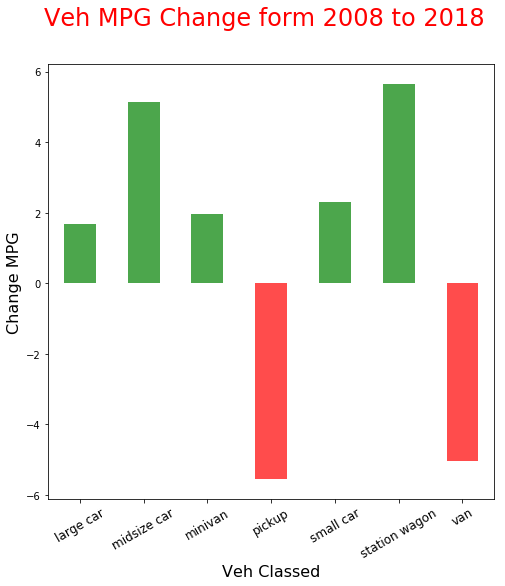

In [672]:
# OK 可以画图鸟
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

colors = []
for value in mpcompare.values:
    if value >= 0:
        colors.append('g')
    else:
        colors.append('r')
mpcompare.plot(kind = 'bar', alpha = 0.7, color = colors)
# color可以通过输入一个列表指定
# 要想根据条件输出不同color，写个循环先建立好color列表
ax.set_xticklabels(mpcompare.index, fontsize = 12, rotation = 30);
ax.set_ylabel('Change MPG', fontsize = 16)
ax.set_xlabel('Veh Classed', fontsize = 16)
fig.suptitle('Veh MPG Change form 2008 to 2018', fontsize = 24, color = 'red');

## Q3: SmartWay 车辆的特点是什么？ 它们是否随着时间而改变？

In [673]:
# smartway labels for 2008
df08c.smartway.unique()

array(['no', 'yes'], dtype=object)

In [674]:
# get all smartway vehicles in 2008
smart_08 = df08c.query('smartway == "yes"')
print(smart_08.info())
smart_08.mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 3 to 979
Data columns (total 13 columns):
model                   380 non-null object
displ                   380 non-null float64
cyl                     380 non-null int64
trans                   380 non-null object
drive                   380 non-null object
fuel                    380 non-null object
veh_class               380 non-null object
air_pollution_score     380 non-null float64
city_mpg                380 non-null float64
hwy_mpg                 380 non-null float64
cmb_mpg                 380 non-null float64
greenhouse_gas_score    380 non-null float64
smartway                380 non-null object
dtypes: float64(6), int64(1), object(6)
memory usage: 41.6+ KB
None


displ                    2.602895
cyl                      4.826316
air_pollution_score      7.365789
city_mpg                21.244737
hwy_mpg                 28.481579
cmb_mpg                 23.926316
greenhouse_gas_score     6.868421
dtype: float64

In [675]:
print(df18c.smartway.unique())
smart_18 = df18c.query('smartway == "Yes" or smartway == "Elite"')
print(smart_18.info())
smart_18.mean()

['No' 'Yes' 'Elite']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 27 to 1355
Data columns (total 13 columns):
model                   211 non-null object
displ                   211 non-null float64
cyl                     211 non-null int64
trans                   211 non-null object
drive                   211 non-null object
fuel                    211 non-null object
veh_class               211 non-null object
air_pollution_score     211 non-null float64
city_mpg                211 non-null float64
hwy_mpg                 211 non-null float64
cmb_mpg                 211 non-null float64
greenhouse_gas_score    211 non-null float64
smartway                211 non-null object
dtypes: float64(6), int64(1), object(6)
memory usage: 23.1+ KB
None


displ                    1.879147
cyl                      4.071090
air_pollution_score      5.255924
city_mpg                38.568720
hwy_mpg                 43.710900
cmb_mpg                 40.469194
greenhouse_gas_score     8.146919
dtype: float64

## Q4: 哪些功能与更好的燃油经济性有关？What features are associated with better fuel economy?
You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [676]:
# 这里课程给出的答案好奇怪，等我想想的
top_08 = df08c.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,3.400221,5.931567,6.739514,25.401766,33.242826,28.357616,5.390728
std,1.165669,1.806379,0.964827,4.912256,4.506949,4.534544,1.832500
min,1.300000,2.000000,4.000000,20.000000,26.000000,24.000000,0.000000
25%,2.500000,4.000000,6.000000,22.000000,30.000000,25.000000,4.000000
50%,3.200000,6.000000,7.000000,24.000000,32.000000,27.000000,6.000000
75%,4.000000,6.000000,7.000000,27.000000,35.000000,30.000000,7.000000
max,7.000000,12.000000,9.500000,57.000000,59.000000,58.000000,10.000000


In [677]:
top_18 = df18c.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,1.978189,4.073937,4.959335,29.707948,36.646950,32.306839,6.530499
std,0.493331,0.569344,1.869396,15.363850,12.388134,13.964045,1.561544
min,0.600000,2.000000,1.000000,21.000000,26.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,29.000000,37.000000,32.000000,7.000000
max,4.000000,6.000000,8.000000,145.000000,121.000000,133.000000,10.000000


## 最后一个问题！对于 2008 年生产且 2018 年仍在生产中的车型，mpg 有多少改进，哪些车辆的改进最多？
这个问题是关于 2008 年以来不断更新换代且 2018 年仍在生产的车型。要回答此问题，我们需要找到两个数据集中都存在的车型，那么先让我们来了解如何将两个数据集合并。

In [693]:
df18d = df18c.copy()
df08d = df08c.copy()
print(df18d.shape)
df18d.columns

(1356, 13)


Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [694]:
print(df08d.shape)
df08d.columns

(987, 13)


Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [696]:
df08d.rename(
    columns = lambda x: x + '_2008', inplace = True)
    ## 将标题后面增加_2008
    ## 只能运行一遍
df08d.columns

Index(['model_2008', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'veh_class_2008', 'air_pollution_score_2008',
       'city_mpg_2008', 'hwy_mpg_2008', 'cmb_mpg_2008',
       'greenhouse_gas_score_2008', 'smartway_2008'],
      dtype='object')

In [699]:
df18d.rename(
    columns = lambda x: x + '_2018', inplace = True)
    ## 将标题后面增加_2008
    ## 只能运行一遍
df18d.columns

Index(['model_2018', 'displ_2018', 'cyl_2018', 'trans_2018', 'drive_2018',
       'fuel_2018', 'veh_class_2018', 'air_pollution_score_2018',
       'city_mpg_2018', 'hwy_mpg_2018', 'cmb_mpg_2018',
       'greenhouse_gas_score_2018', 'smartway_2018'],
      dtype='object')

In [695]:
# 需要使用merge将2个数据融合
# 就能根据mode有2个以上的value count来判断是否两个都有了

In [701]:
# 为什么要有个一样的model呢，因为合并时候要有一列相同才好合并么
# merge的说明
df_combined = pd.merge(df08d, df18d, left_on='model_2008', right_on='model_2018')
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollution_score_2008,city_mpg_2008,hwy_mpg_2008,...,trans_2018,drive_2018,fuel_2018,veh_class_2018,air_pollution_score_2018,city_mpg_2018,hwy_mpg_2018,cmb_mpg_2018,greenhouse_gas_score_2018,smartway_2018
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,25.0,35.0,...,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,27.0,27.0,6.0,No
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,25.0,35.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4.0,No
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,25.0,35.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5.0,No
3,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,25.0,35.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4.0,No
4,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,25.0,35.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,19.0,26.0,22.0,4.0,No


In [702]:
df_combined.shape

(1437, 26)

In [703]:
df_combined.columns

Index(['model_2008', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'veh_class_2008', 'air_pollution_score_2008',
       'city_mpg_2008', 'hwy_mpg_2008', 'cmb_mpg_2008',
       'greenhouse_gas_score_2008', 'smartway_2008', 'model_2018',
       'displ_2018', 'cyl_2018', 'trans_2018', 'drive_2018', 'fuel_2018',
       'veh_class_2018', 'air_pollution_score_2018', 'city_mpg_2018',
       'hwy_mpg_2018', 'cmb_mpg_2018', 'greenhouse_gas_score_2018',
       'smartway_2018'],
      dtype='object')

In [709]:
# Plus 其实 merge 也是prefix这个选项的，处理起来就简单多了
df18e = df18c.copy()
df08e = df08c.copy()

# 而且可以用 df1.merge() 这种方式的语法
# 重构如下
df_combined2 = df08e.merge(df18e, on='model', suffixes=('_2008', '_2018'))

# 因为这种方法 on 是同一列，还省去了删除model_2018的工作
# 结果如下两个 Cell

In [710]:
df_combined2.shape

(1437, 25)

In [711]:
df_combined2.columns

Index(['model', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'veh_class_2008', 'air_pollution_score_2008',
       'city_mpg_2008', 'hwy_mpg_2008', 'cmb_mpg_2008',
       'greenhouse_gas_score_2008', 'smartway_2008', 'displ_2018', 'cyl_2018',
       'trans_2018', 'drive_2018', 'fuel_2018', 'veh_class_2018',
       'air_pollution_score_2018', 'city_mpg_2018', 'hwy_mpg_2018',
       'cmb_mpg_2018', 'greenhouse_gas_score_2018', 'smartway_2018'],
      dtype='object')

In [714]:
mpg2018 = df_combined2.groupby('model')['city_mpg_2018'].mean()
mpg2018

model
ACURA MDX                   20.400000
ACURA RDX                   19.500000
AUDI A3                     25.000000
AUDI A4                     24.000000
AUDI A6                     22.333333
AUDI A8 L                   17.500000
AUDI Q7                     19.000000
AUDI R8                     14.000000
AUDI S4                     21.000000
AUDI S5                     21.000000
AUDI S6                     16.000000
AUDI S8                     14.000000
AUDI TT Coupe               23.000000
AUDI TT Roadster            23.000000
BMW 750i                    16.500000
BMW Alpina B7               16.000000
BMW M5                      15.000000
BMW M6 Convertible          14.500000
BUICK Enclave               17.500000
CADILLAC CTS                19.600000
CADILLAC Escalade           14.000000
CHEVROLET Corvette          14.750000
CHEVROLET Equinox           25.000000
CHEVROLET Impala            18.250000
CHEVROLET Malibu            31.250000
CHEVROLET Silverado 15      15.055556
CHEVRO

In [716]:
mpg2008 = df_combined2.groupby('model')['city_mpg_2008'].mean()
mpg2008

model
ACURA MDX                   25.000000
ACURA RDX                   26.000000
AUDI A3                     21.333333
AUDI A4                     15.250000
AUDI A6                     24.333333
AUDI A8 L                   24.000000
AUDI Q7                     24.500000
AUDI R8                     21.000000
AUDI S4                     18.000000
AUDI S5                     14.000000
AUDI S6                     14.000000
AUDI S8                     14.000000
AUDI TT Coupe               17.000000
AUDI TT Roadster            19.000000
BMW 750i                    21.000000
BMW Alpina B7               23.000000
BMW M5                      23.500000
BMW M6 Convertible          19.500000
BUICK Enclave               19.000000
CADILLAC CTS                17.400000
CADILLAC Escalade           17.000000
CHEVROLET Corvette          23.000000
CHEVROLET Equinox           16.250000
CHEVROLET Impala            21.500000
CHEVROLET Malibu            22.000000
CHEVROLET Silverado 15      20.500000
CHEVRO

In [717]:
# 两个数据都有了，那么我们画图好了吧
# 太多了！根据题目，需要研究的是那些改动最多
# 那么先计算一下吧
mpgchange = mpg2018 - mpg2008
# 我们来排序一下(还有sort_index)
top10 = round(mpgchange.sort_values()[:10],2)
top10

model
LEXUS LX 570                   -44.00
MASERATI Granturismo           -26.00
MERCEDES-BENZ SL550            -13.00
JEEP Wrangler                  -12.00
KIA Sorento                    -11.67
LEXUS ES 350                   -11.00
LAND ROVER Range Rover Sport   -10.25
DODGE Durango                  -10.15
KIA Sedona                     -10.00
NISSAN Armada                   -9.50
dtype: float64

In [718]:
# 我们来检查下数据
print(mpgchange['JEEP Wrangler'])
print(mpg2008['JEEP Wrangler'])
print(mpg2018['JEEP Wrangler'])

-12.0
29.25
17.25


In [719]:
last10 = round(mpgchange.sort_values(ascending = False)[:10],2)
last10

model
TOYOTA Prius         36.00
FORD Focus           12.40
HONDA Accord         11.41
TOYOTA Corolla       10.17
HONDA Fit             9.67
HYUNDAI Elantra       9.67
CHEVROLET Malibu      9.25
AUDI A4               8.75
CHEVROLET Equinox     8.75
MAZDA MX-5            8.67
dtype: float64

### 接下来就可以吧top10和last10画图了，此处自己动手试试吧！